## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

> <p>There are 294,478 rows and 5 columns in the database</p>

c. The number of unique users in the dataset.

In [4]:
#df.nunique()
df.user_id.nunique()

290584

> <p>There are 290,584 users in the dataset</p>

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

> <p>There are about 12% users who converted to the new page</p>

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
pd.crosstab(df.group, df.landing_page, margins = True )

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


> <p>There are 1965 entries where the treatment was for the old_page, and 1928 entries where the control was for the new_page. Total, this equals 3893, which is the number of times new_page and treatment don't line up.</p>

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> <p>There are no missing values in the dataset.</p>

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.

> <p>We should remove the rows where the landing_page and group columns don't match - we should only use rows that provide accurate data.</p>

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page')) | ((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

> <p>There are 290, 584 unique user ids in the new dataframe.</p>

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#df2[df2.user_id.duplicated()]['user_id']
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> <p>User_id #773192 was a duplicate</p>

c. What is the row information for the repeat **user_id**? 

> <p>User_id #773192 was on row 2893</p>

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2.shape

(290585, 5)

In [13]:
df2 = df2.drop_duplicates(subset = 'user_id')

In [14]:
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [16]:
df2.converted.mean()

0.11959708724499628

> <p>There is about a 12% chance of an individual converting, regardless of the page they received (old or new).</p>

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

> <p>Individuals in the control group converted 12% of the time.</p>

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

> <p>Individuals in the treatment group converted 11.88% of the time.</p>

d. What is the probability that an individual received the new page?

In [19]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

> <p>Individuals had a 50% chance of receiving the new page</p>

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> **Answer:** <p>The evidence pointing to the new treatment page leading to more conversions is very slight. The control group had a conversion rate of just over 12% (0.1204), while the treatment group had a conversion rate of 11.88% (0.118). At this point, we need more conclusive evidence that can be acheived using A/B testing and regression techniques.</p>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

> **Hypothesis:** <p>$H_{0}$: $p_{old}$ >= $p_{new}$</p>
    <p>$H_{1}$: $p_{old}$ < $p_{new}$</p>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

> <p>The conversion rate for $p_{new}$ under the null is 11.96%.</p> 
  <p>This is because $p_{new}$ and $p_{old}$ are equal.</p>

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

> <p>The conversion rate for $p_{old}$ under the null is 11.96%.</p>

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
# new dataframe with df2

new_df = df2.query('landing_page == "new_page"')
new_n = new_df.shape[0]
new_n

145310

> <p>There are 145,310 individuals in the treatment group.</p>

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
old_df = df2.query('landing_page =="old_page"')
old_n = old_df.shape[0]
old_n

145274

> <p>There are 145,274 individuals in the control group</p>

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(new_n , p_new)
new_page_converted

17318

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(old_n , p_old)
old_page_converted

17540

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_diff = (new_page_converted/new_n) - (old_page_converted/old_n)
p_diff

-0.0015576804428405894

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range (10000):
    new_page_converted_sim = np.random.binomial(new_n, p_new)/new_n
    old_page_converted_sim = np.random.binomial(old_n, p_old)/old_n
    diff = new_page_converted_sim - old_page_converted_sim 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

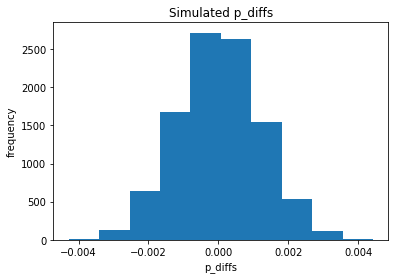

In [28]:
plt.hist(p_diffs);
plt.title('Simulated p_diffs');
plt.xlabel('p_diffs');
plt.ylabel('frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Original means, from orignal dataset
original_old = df.query('group == "control"').converted.mean()
original_new = df.query('group == "treatment"').converted.mean()
original_diff = original_new - original_old

# Change p_diffs to an array
p_diffs = np.array(p_diffs)

# Now we can calculate the proportion
(p_diffs > original_diff).mean()

0.89400000000000002

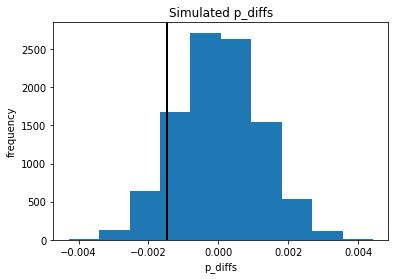

In [30]:
plt.hist(p_diffs);
plt.title('Simulated p_diffs');
plt.xlabel('p_diffs');
plt.ylabel('frequency');
plt.axvline(original_diff, c = "black", linewidth = 2);

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> **Answer:** <p>The value calculated is the p-value of observing the statistic (or observing a more extreme statistic in favor of the alternative). Taking a look at the numbers, and viewing the graph, we see that there is no significant advantage to the new page. We would fail to reject the Null hypothesis, thus keeping the old page since it performs slightly better.</p>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [33]:
print(norm.cdf(z_score))

0.905058312759


In [34]:
# Assume a 95% confidence level
print(norm.ppf(1-(0.05)))

1.64485362695


> **Answer:** <p> The z-score of 1.31092 is less than the critical value of 1.64485</p> <p>We fail to reject the Null, which is consistent with calculations in parts. j. and k.</p>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> **Answer:** <p>The appropriate type of regression to use her would be Logistic Regression, since this is a yes/no type of variable.</p>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2['intercept'] = 1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:
import statsmodels.api as sm

logit = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        16:28:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> **Answer:** <p>The p-value is -1.311</p> <p>The hypothesis presented here is different from Part II because it is suggesting that there is no statistical evidence of the conversion rate differences. In addition, the p-value here is far different from the p-value calculated in Part II (0.89).</p> <p>$H_{0}$: $p_{new}$ - $p_{old}$ = 0</p> <p>$H_{1}$: $p_{new}$ - $p_{old}$ != 0</p>  
**OR** <p>$H_{1}$: $p_{new}$ != $p_{old}$</p> 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> **Answer:** <p>Clearer, more accurate decisions can be made when other factors are considered because factors that weren't originally thought of may be having a significant impact on the results, or vice-versa, where factors may be less important than initially thought to be.</p> <p>However, consider Simpson's Paradox when considering other factors - a trend may appear in separate testing of several different factors of the dataset, but that trend disappears or reverses when these factors undergo combined testing.</p>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [40]:
df_new.country.value_counts()
# United States, United Kingdom, and Canada

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [41]:
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA', 'US']]

df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
df['intercept'] = 1

lin_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = lin_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Mar 2019   Pseudo R-squ.:                 -0.2214
Time:                        16:28:45   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

In [43]:
df.groupby('group').mean()['converted']

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

<a id='conclusions'></a>

## Conclusions:

> <p>This notebook explores the results of an A/B test run by an e-commerce website to help their team decide on whether or not to implement their new webpage (or keep their old webpage). Since there were no specific feature(s) on the webpage called out for individual testing, this is a multivariate test, and thus more complicated to make decisions from since you are testing multiple factors that may or may not be influencing the testing (reference Part III.f. and the discussion on Simpson's Paradox).</p> <p>The dataset collected from the user tests was explored through basic probability calculations and understanding the dataset, then A/B testing, then finally Logistic Regression. The results of these tests did not provide clear, actionable decisions that could be made regarding the use of the new page versus the old page.</p> <p>During the probability portion of the analysis the old page lead to more conversions, but only by a slight margin. During the A/B testing portion, a similar result occured with the old page leading to more conversions but only slightly. The same was true for the Logistic Regression analysis - the old page barely led to more conversions.</p> <p>Due to the fact that the performance of the old page was slightly better than the performance of the new page, we fail to reject the Null hypothesis (and reject the Alternative) due to the calculation results and analysis from Probability, A/B testing, and Logistic Regression. The company should keep their old webpage for now, because it converts the most users to paying customers.</p> <p>It is important to note the conclusions are provided based solely on the data provided, and the analysis has its limits based on the limits of the data.</p> <p>IF I worked at the e-commerce company, I would recommend collecting more data on exactly which features from the new and old webpages users preferred. Yes, this would be a much longer analysis, but there is value to be thorough when testing website usage, particularly because the company's website it how they earn their profits. It is in the company's best interest to have the best website they can, while at the same time meet users' needs and desires to ensure maximum site usage.</p>

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0